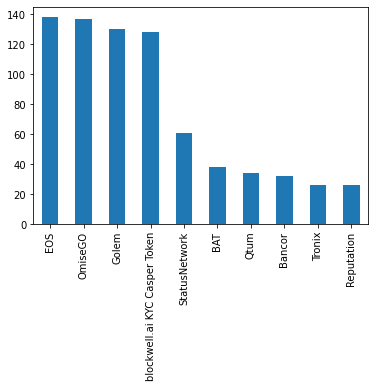

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load csv data into a pandas dataframe
data = pd.read_csv("transaction_dataset.csv")

# Trim leading whitespace from values in column 50
data[" ERC20 most sent token type"] = data[" ERC20 most sent token type"].str.lstrip()

# Exclude "None" and "0" and NA values from bar chart
counts = data[" ERC20 most sent token type"].value_counts()
counts = counts[~counts.index.isin(['None', '0',''])]

# Show top 10 counts in bar chart
top_counts = counts[:10]

# Create bar chart
top_counts.plot(kind='bar')

# Set the x-axis label to be horizontal
plt.xticks(rotation=90)

# Display the chart
plt.show()

